In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

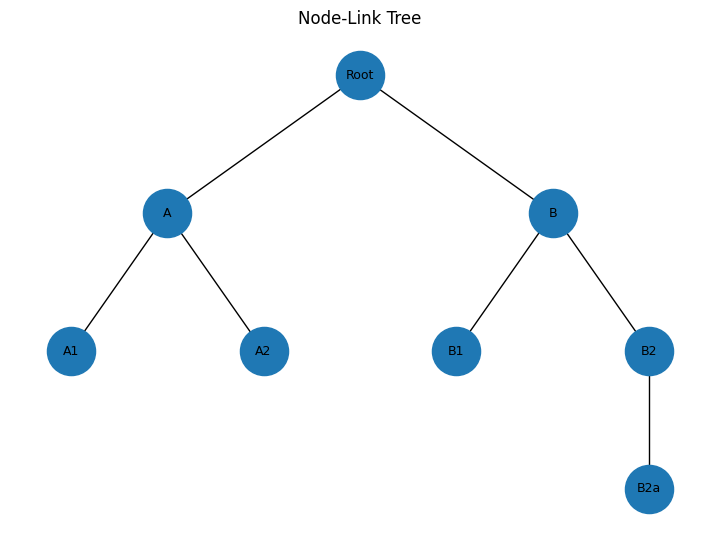

In [3]:
# Define the tree as (parent, child) edges
edges = [
    ("Root","A"), ("Root","B"),
    ("A","A1"), ("A","A2"),
    ("B","B1"), ("B","B2"), ("B2","B2a")
]

G = nx.DiGraph()
G.add_edges_from(edges)

# Simple hierarchical layout
def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    if root is None:
        root = [n for n, d in G.in_degree() if d == 0][0]
    def _hierarchy_pos(G, root, left, right, vert_loc, vert_gap, pos=None, parent=None):
        if pos is None:
            pos = {}
        pos[root] = ((left + right) / 2, vert_loc)
        children = list(G.successors(root))
        if children:
            dx = (right - left) / len(children)
            nextx = left
            for child in children:
                pos = _hierarchy_pos(G, child, nextx, nextx + dx, vert_loc - vert_gap, vert_gap, pos, root)
                nextx += dx
        return pos
    return _hierarchy_pos(G, root, 0, width, vert_loc, vert_gap)

pos = hierarchy_pos(G, root="Root")
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_size=1200, font_size=9, arrows=False)
plt.title("Node-Link Tree")
plt.show()